In [1]:
!pip install beautifulsoup4
!pip install matplotlib


In [2]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = "https://in.bgu.ac.il/en/natural_science/LifeSciences/Pages/Research.aspx"
page = urlopen(url)
html = page.read().decode("utf-8")
soup = BeautifulSoup(html, "html.parser")

In [3]:
content = soup.find("div", class_ = "page_content")

In [4]:
rel_content = content.find_all('li') # Search by tag

In [5]:
# Iterate tags and extract data
lbls = ["Name","Link","Department"]
table = pd.DataFrame(columns=lbls)
reg = re.compile(r"^Prof|Dr")
for dep in rel_content:
    name = dep.find_all('p')
    for n in name:
        if n is not None and len(n) > 0:
            dep_label = [text for text in n.stripped_strings]
            if dep_label != []:
                dep_label = re.sub('[\u200b|\xa0]','',''.join(dep_label)) # clean spaces
            if 'Prof' not in dep_label and 'Dr' not in dep_label:
                cur_dep_label = dep_label
            res_names = n.find_all('a')
            if res_names is not None:
                for res in res_names:
                    txt = res.get_text()
                    link = res.get('href')
                    values = [txt,link,cur_dep_label]
                    table = table.append(dict(zip(lbls,values)),ignore_index=True)
table

,Name,Link,Department
0,Prof. Amir Aharoni,/en/natural_science/LifeSciences/Pages/staff/A...,Biochemistry and Molecular Biology
1,Prof. Lital Alfonta,/en/natural_science/LifeSciences/Pages/staff/L...,Biochemistry and Molecular Biology
2,Prof. Dudy Bar-Zvi ​,/en/natural_science/LifeSciences/Pages/staff/D...,Biochemistry and Molecular Biology
3,Prof. Anat Ben-Zvi,/en/natural_science/LifeSciences/Pages/staff/A...,Biochemistry and Molecular Biology
4,Dr. Shimon Bershtein,/en/natural_science/LifeSciences/Pages/staff/S...,Biochemistry and Molecular Biology
...,...,...,...
73,Dr. Natalie Elia,/en/natural_science/LifeSciences/Pages/staff/N...,Structural Biology/Computational Biology
74,Dr. Gabriel Frank,/en/natural_science/LifeSciences/Pages/staff/G...,Structural Biology/Computational Biology
75,Dr. Iris Grossman-Haham,/en/natural_science/LifeSciences/pages/staff/I...,Structural Biology/Computational Biology
76,Dr. Tal Shay,/en/natural_science/LifeSciences/Pages/staff/T...,Structural Biology/Computational Biology


In [6]:
# enter each link and extract bio
data_bio=[]
links = table["Link"]
id_bio = "t364bb38a-f866-440d-9edb-d7d870b66585"
for ind_l,l in enumerate(links):
    url = "https://in.bgu.ac.il/" + l
    try:
        page = urlopen(url)
        html = page.read().decode("utf-8")
    except:
        data_bio.append("Something Wrong")
        continue
    soup = BeautifulSoup(html, "html.parser")
    bio_info = soup.find('div', id=id_bio)
    data_bio.append(bio_info.get_text().strip())

In [7]:
# remove empty rows
table["Bio"] = data_bio
table['Name'].replace('', np.nan, inplace=True)
table.dropna(subset=['Name'], inplace=True)

table

,Name,Link,Department,Bio
0,Prof. Amir Aharoni,/en/natural_science/LifeSciences/Pages/staff/A...,Biochemistry and Molecular Biology,We are interested in generating proteins with ...
1,Prof. Lital Alfonta,/en/natural_science/LifeSciences/Pages/staff/L...,Biochemistry and Molecular Biology,The combination of Synthetic Biology and Synth...
2,Prof. Dudy Bar-Zvi ​,/en/natural_science/LifeSciences/Pages/staff/D...,Biochemistry and Molecular Biology,Current Projects \r We are interested in salt-...
3,Prof. Anat Ben-Zvi,/en/natural_science/LifeSciences/Pages/staff/A...,Biochemistry and Molecular Biology,Background\r The long-term health of all metaz...
4,Dr. Shimon Bershtein,/en/natural_science/LifeSciences/Pages/staff/S...,Biochemistry and Molecular Biology,There is a growing appreciation that horizonta...
...,...,...,...,...
73,Dr. Natalie Elia,/en/natural_science/LifeSciences/Pages/staff/N...,Structural Biology/Computational Biology,Research interest:\r Understanding the kinetic...
74,Dr. Gabriel Frank,/en/natural_science/LifeSciences/Pages/staff/G...,Structural Biology/Computational Biology,We are interested in establishing direct corre...
75,Dr. Iris Grossman-Haham,/en/natural_science/LifeSciences/pages/staff/I...,Structural Biology/Computational Biology,Background\r Cilia and eukaryotic flagella are...
76,Dr. Tal Shay,/en/natural_science/LifeSciences/Pages/staff/T...,Structural Biology/Computational Biology,Our computational immunology group studies tra...


In [10]:
table.to_csv('Life_Science_Researchers.csv',index = False)

Text(0.5, 1.0, 'Researchers by department')

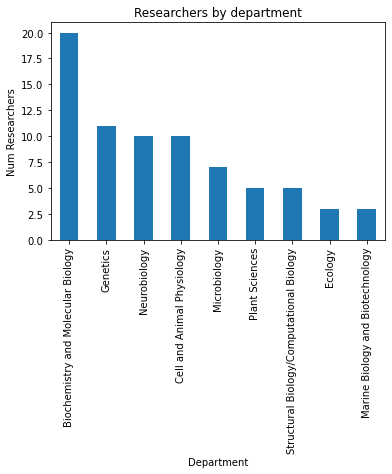

In [9]:
table["Department"].value_counts().plot(kind='bar')
plt.xlabel('Department')
plt.ylabel('Num Researchers')
plt.title('Researchers by department')